# Data Collection

In [2]:
import json
import os
import pandas as pd
from bs4 import BeautifulSoup
import requests
import random

In [3]:
# File paths and folders
flags_folder = "/kaggle/working/flag_images"  
anthem_folder = "/kaggle/working/anthems_music"  
anthem_text_folder = "/kaggle/working/anthems_text"
# Create folders if they don't exist
os.makedirs(flags_folder, exist_ok=True)
os.makedirs(anthem_folder, exist_ok=True)
os.makedirs(anthem_text_folder,exist_ok=True)
data = []

country_codes = {
    "AD": "Andorra",
    "AE": "United Arab Emirates",
    "AF": "Afghanistan",
    "AG": "Antigua and Barbuda",
    "AI": "Anguilla",
    "AL": "Albania",
    "AM": "Armenia",
    "AO": "Angola",
    "AQ": "Antarctica",
    "AR": "Argentina",
    "AS": "American Samoa",
    "AT": "Austria",
    "AU": "Australia",
    "AW": "Aruba",
    "AX": "\u00c5land Islands",
    "AZ": "Azerbaijan",
    "BA": "Bosnia and Herzegovina",
    "BB": "Barbados",
    "BD": "Bangladesh",
    "BE": "Belgium",
    "BF": "Burkina Faso",
    "BG": "Bulgaria",
    "BH": "Bahrain",
    "BI": "Burundi",
    "BJ": "Benin",
    "BL": "Saint Barthélemy",
    "BM": "Bermuda",
    "BN": "Brunei Darussalam",
    "BO": "Bolivia, Plurinational State of",
    "BQ": "Caribbean Netherlands",
    "BR": "Brazil",
    "BS": "Bahamas",
    "BT": "Bhutan",
    "BV": "Bouvet Island",
    "BW": "Botswana",
    "BY": "Belarus",
    "BZ": "Belize",
    "CA": "Canada",
    "CC": "Cocos (Keeling) Islands",
    "CD": "Congo, the Democratic Republic of the",
    "CF": "Central African Republic",
    "CG": "Republic of the Congo",
    "CH": "Switzerland",
    "CI": "C\u00f4te d'Ivoire",
    "CK": "Cook Islands",
    "CL": "Chile",
    "CM": "Cameroon",
    "CN": "China (People's Republic of China)",
    "CO": "Colombia",
    "CR": "Costa Rica",
    "CU": "Cuba",
    "CV": "Cape Verde",
    "CW": "Cura\u00e7ao",
    "CX": "Christmas Island",
    "CY": "Cyprus",
    "CZ": "Czech Republic",
    "DE": "Germany",
    "DJ": "Djibouti",
    "DK": "Denmark",
    "DM": "Dominica",
    "DO": "Dominican Republic",
    "DZ": "Algeria",
    "EC": "Ecuador",
    "EE": "Estonia",
    "EG": "Egypt",
    "EH": "Western Sahara",
    "ER": "Eritrea",
    "ES": "Spain",
    "ET": "Ethiopia",
    "EU": "Europe",
    "FI": "Finland",
    "FJ": "Fiji",
    "FK": "Falkland Islands (Malvinas)",
    "FM": "Micronesia, Federated States of",
    "FO": "Faroe Islands",
    "FR": "France",
    "GA": "Gabon",
    "GB-ENG": "England",
    "GB-NIR": "Northern Ireland",
    "GB-SCT": "Scotland",
    "GB-WLS": "Wales",
    "GB": "United Kingdom",
    "GD": "Grenada",
    "GE": "Georgia",
    "GF": "French Guiana",
    "GG": "Guernsey",
    "GH": "Ghana",
    "GI": "Gibraltar",
    "GL": "Greenland",
    "GM": "Gambia",
    "GN": "Guinea",
    "GP": "Guadeloupe",
    "GQ": "Equatorial Guinea",
    "GR": "Greece",
    "GS": "South Georgia and the South Sandwich Islands",
    "GT": "Guatemala",
    "GU": "Guam",
    "GW": "Guinea-Bissau",
    "GY": "Guyana",
    "HK": "Hong Kong",
    "HM": "Heard Island and McDonald Islands",
    "HN": "Honduras",
    "HR": "Croatia",
    "HT": "Haiti",
    "HU": "Hungary",
    "ID": "Indonesia",
    "IE": "Ireland",
    "IL": "Israel",
    "IM": "Isle of Man",
    "IN": "India",
    "IO": "British Indian Ocean Territory",
    "IQ": "Iraq",
    "IR": "Iran, Islamic Republic of",
    "IS": "Iceland",
    "IT": "Italy",
    "JE": "Jersey",
    "JM": "Jamaica",
    "JO": "Jordan",
    "JP": "Japan",
    "KE": "Kenya",
    "KG": "Kyrgyzstan",
    "KH": "Cambodia",
    "KI": "Kiribati",
    "KM": "Comoros",
    "KN": "Saint Kitts and Nevis",
    "KP": "Korea, Democratic People's Republic of",
    "KR": "Korea, Republic of",
    "KW": "Kuwait",
    "KY": "Cayman Islands",
    "KZ": "Kazakhstan",
    "LA": "Laos (Lao People's Democratic Republic)",
    "LB": "Lebanon",
    "LC": "Saint Lucia",
    "LI": "Liechtenstein",
    "LK": "Sri Lanka",
    "LR": "Liberia",
    "LS": "Lesotho",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LV": "Latvia",
    "LY": "Libya",
    "MA": "Morocco",
    "MC": "Monaco",
    "MD": "Moldova, Republic of",
    "ME": "Montenegro",
    "MF": "Saint Martin",
    "MG": "Madagascar",
    "MH": "Marshall Islands",
    "MK": "North Macedonia",
    "ML": "Mali",
    "MM": "Myanmar",
    "MN": "Mongolia",
    "MO": "Macao",
    "MP": "Northern Mariana Islands",
    "MQ": "Martinique",
    "MR": "Mauritania",
    "MS": "Montserrat",
    "MT": "Malta",
    "MU": "Mauritius",
    "MV": "Maldives",
    "MW": "Malawi",
    "MX": "Mexico",
    "MY": "Malaysia",
    "MZ": "Mozambique",
    "NA": "Namibia",
    "NC": "New Caledonia",
    "NE": "Niger",
    "NF": "Norfolk Island",
    "NG": "Nigeria",
    "NI": "Nicaragua",
    "NL": "Netherlands",
    "NO": "Norway",
    "NP": "Nepal",
    "NR": "Nauru",
    "NU": "Niue",
    "NZ": "New Zealand",
    "OM": "Oman",
    "PA": "Panama",
    "PE": "Peru",
    "PF": "French Polynesia",
    "PG": "Papua New Guinea",
    "PH": "Philippines",
    "PK": "Pakistan",
    "PL": "Poland",
    "PM": "Saint Pierre and Miquelon",
    "PN": "Pitcairn",
    "PR": "Puerto Rico",
    "PS": "Palestine",
    "PT": "Portugal",
    "PW": "Palau",
    "PY": "Paraguay",
    "QA": "Qatar",
    "RE": "Réunion",
    "RO": "Romania",
    "RS": "Serbia",
    "RU": "Russian Federation",
    "RW": "Rwanda",
    "SA": "Saudi Arabia",
    "SB": "Solomon Islands",
    "SC": "Seychelles",
    "SD": "Sudan",
    "SE": "Sweden",
    "SG": "Singapore",
    "SH": "Saint Helena, Ascension and Tristan da Cunha",
    "SI": "Slovenia",
    "SJ": "Svalbard and Jan Mayen Islands",
    "SK": "Slovakia",
    "SL": "Sierra Leone",
    "SM": "San Marino",
    "SN": "Senegal",
    "SO": "Somalia",
    "SR": "Suriname",
    "SS": "South Sudan",
    "ST": "Sao Tome and Principe",
    "SV": "El Salvador",
    "SX": "Sint Maarten (Dutch part)",
    "SY": "Syrian Arab Republic",
    "SZ": "Kingdom of Eswatini",
    "TC": "Turks and Caicos Islands",
    "TD": "Chad",
    "TF": "French Southern Territories",
    "TG": "Togo",
    "TH": "Thailand",
    "TJ": "Tajikistan",
    "TK": "Tokelau",
    "TL": "Timor-Leste",
    "TM": "Turkmenistan",
    "TN": "Tunisia",
    "TO": "Tonga",
    "TR": "Republic of Türkiye",
    "TT": "Trinidad and Tobago",
    "TV": "Tuvalu",
    "TW": "Taiwan (Republic of China)",
    "TZ": "Tanzania, United Republic of",
    "UA": "Ukraine",
    "UG": "Uganda",
    "UM": "US Minor Outlying Islands",
    "US": "United States",
    "UY": "Uruguay",
    "UZ": "Uzbekistan",
    "VA": "Holy See (Vatican City State)",
    "VC": "Saint Vincent and the Grenadines",
    "VE": "Venezuela, Bolivarian Republic of",
    "VG": "Virgin Islands, British",
    "VI": "Virgin Islands, U.S.",
    "VN": "Vietnam",
    "VU": "Vanuatu",
    "WF": "Wallis and Futuna Islands",
    "WS": "Samoa",
    "XK": "Kosovo",
    "YE": "Yemen",
    "YT": "Mayotte",
    "ZA": "South Africa",
    "ZM": "Zambia",
    "ZW": "Zimbabwe"
}


In [4]:
# Headers for HTTP requests
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36",
    "Accept": "*/*",
    "Accept-Encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
}

# Select 150 random countries from JSON data
selected_items = random.sample(list(country_codes.items()), 123)

In [5]:
selected_items

[('AI', 'Anguilla'),
 ('RU', 'Russian Federation'),
 ('LT', 'Lithuania'),
 ('NR', 'Nauru'),
 ('BG', 'Bulgaria'),
 ('YE', 'Yemen'),
 ('CW', 'Curaçao'),
 ('GD', 'Grenada'),
 ('EE', 'Estonia'),
 ('EC', 'Ecuador'),
 ('VG', 'Virgin Islands, British'),
 ('AF', 'Afghanistan'),
 ('GE', 'Georgia'),
 ('GB', 'United Kingdom'),
 ('IM', 'Isle of Man'),
 ('IN', 'India'),
 ('OM', 'Oman'),
 ('QA', 'Qatar'),
 ('ZA', 'South Africa'),
 ('TL', 'Timor-Leste'),
 ('TZ', 'Tanzania, United Republic of'),
 ('PY', 'Paraguay'),
 ('GF', 'French Guiana'),
 ('ET', 'Ethiopia'),
 ('FJ', 'Fiji'),
 ('KP', "Korea, Democratic People's Republic of"),
 ('MX', 'Mexico'),
 ('MQ', 'Martinique'),
 ('MY', 'Malaysia'),
 ('MT', 'Malta'),
 ('VE', 'Venezuela, Bolivarian Republic of'),
 ('DK', 'Denmark'),
 ('UM', 'US Minor Outlying Islands'),
 ('BH', 'Bahrain'),
 ('TJ', 'Tajikistan'),
 ('AT', 'Austria'),
 ('RW', 'Rwanda'),
 ('AO', 'Angola'),
 ('IS', 'Iceland'),
 ('LK', 'Sri Lanka'),
 ('AU', 'Australia'),
 ('MZ', 'Mozambique'),
 ('BQ'

In [6]:
for i, (code, country) in enumerate(selected_items):
    lowercase_code = code.lower()
    
    # Paths for flag and anthem files
    flag_path = os.path.join(flags_folder, f"{lowercase_code}.jpg")  
    anthem_music_path = os.path.join(anthem_folder, f"{lowercase_code}.mp3")
    anthem_english_translation = os.path.join(anthem_text_folder, f"{lowercase_code}.txt")
    
    # Download flag
    flag_url = f"https://flagcdn.com/w320/{lowercase_code}.png"  
    flag_response = requests.get(flag_url, headers=headers)
    if flag_response.status_code == 200:
        with open(flag_path, "wb") as file:
            file.write(flag_response.content)
        print(f"Downloaded flag for {country}")
    else:
        flag_path = None
    
    # Download anthem
    anthem_url = f"https://nationalanthems.info/{lowercase_code}.mp3"
    anthem_response = requests.get(anthem_url, stream=True, headers=headers)
    if anthem_response.status_code == 200:
        with open(anthem_music_path, "wb") as file:
            file.write(anthem_response.content)
        print(f"Downloaded anthem for {country}")
    else:
        anthem_music_path = None
    
    # Scrape English translation of the anthem
    anthem_text = ""
    url = f"https://nationalanthems.info/{lowercase_code}.htm"
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        english_translation_div = soup.find(lambda tag: tag.name == "div" and tag.get("title") in ["English lyrics", "English translation"])

        if english_translation_div:
            anthem_div = english_translation_div.find_next_sibling("div")
            if anthem_div:
                inner_div = anthem_div.find("div", align="left")
                if inner_div:
                    for tag in inner_div.find_all():
                        if tag.name != "br":
                            tag.decompose()
                    for br in inner_div.find_all("br"):
                        br.decompose()
                    anthem_text = " ".join(inner_div.stripped_strings)
        #print(anthem_text)
        if anthem_text:
            with open(anthem_english_translation, "w") as file:
                file.write(anthem_text)
            print(f"Downloaded English translation for {country}")
        else:
            anthem_english_translation = None

    # Append data to the list
    data.append([lowercase_code, country, flag_path, anthem_music_path, anthem_english_translation])


Downloaded flag for Anguilla
Downloaded anthem for Anguilla
Downloaded English translation for Anguilla
Downloaded flag for Russian Federation
Downloaded anthem for Russian Federation
Downloaded English translation for Russian Federation
Downloaded flag for Lithuania
Downloaded anthem for Lithuania
Downloaded English translation for Lithuania
Downloaded flag for Nauru
Downloaded anthem for Nauru
Downloaded English translation for Nauru
Downloaded flag for Bulgaria
Downloaded anthem for Bulgaria
Downloaded English translation for Bulgaria
Downloaded flag for Yemen
Downloaded anthem for Yemen
Downloaded English translation for Yemen
Downloaded flag for Curaçao
Downloaded anthem for Curaçao
Downloaded English translation for Curaçao
Downloaded flag for Grenada
Downloaded anthem for Grenada
Downloaded English translation for Grenada
Downloaded flag for Estonia
Downloaded anthem for Estonia
Downloaded English translation for Estonia
Downloaded flag for Ecuador
Downloaded anthem for Ecuador


In [7]:
# Create a DataFrame from the collected data and save it as a CSV file
df = pd.DataFrame(data, columns=["country_code", "country_name", "flag_path", "anthem_music_path", "anthem_text_path"])
df = df.dropna()
df = df.reset_index(drop=True)
df = df[:100]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country_code       100 non-null    object
 1   country_name       100 non-null    object
 2   flag_path          100 non-null    object
 3   anthem_music_path  100 non-null    object
 4   anthem_text_path   100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [9]:
csv_path = "countries_flags_and_anthems.csv"
df.to_csv(csv_path, index=False)

print(f"CSV file saved at: {csv_path}")


CSV file saved at: countries_flags_and_anthems.csv


# Images analysis

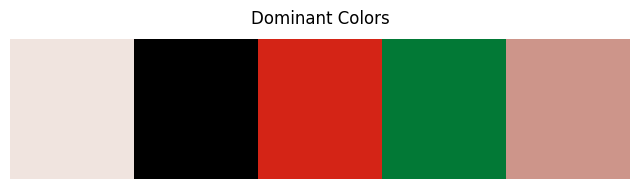

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def analyze_flag_colors(image_path, n_colors=5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((-1, 3))  # Flatten the image into RGB pixels

    kmeans = KMeans(n_clusters=n_colors, n_init=10)  # Suppress warning
    kmeans.fit(image)
    dominant_colors = kmeans.cluster_centers_
    
    return dominant_colors.astype(int)  # Convert to integers for RGB values

def plot_dominant_colors(colors):
    plt.figure(figsize=(8, 2))
    for i, color in enumerate(colors):
        plt.barh(0, width=1, left=i, color=color / 255.0)
    plt.xlim(0, len(colors))
    plt.title('Dominant Colors')
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/kaggle/working/flag_images/af.jpg'
dominant_colors = analyze_flag_colors(image_path)
plot_dominant_colors(dominant_colors)


In [11]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Path to folder containing flag images
FLAG_FOLDER = "/kaggle/working/flag_images/"
OUTPUT_CSV = "/kaggle/working/flag_image_analysis.csv"

# Function to get aspect ratio
def get_aspect_ratio(image):
    h, w, _ = image.shape
    return round(w / h, 2)

# Function to extract dominant colors using K-Means
def get_dominant_colors(image, k=2):
    pixels = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)
    return colors

# Function to check symmetry using edge detection
def check_symmetry(image):
    edges = cv2.Canny(image, 100, 200)
    h, w = edges.shape
    left_half = edges[:, :w//2]
    right_half = edges[:, w//2:]
    similarity = np.sum(left_half == right_half) / left_half.size
    return round(similarity, 2)

# Function to count edges in the flag (complexity measure)
def count_edges(image):
    edges = cv2.Canny(image, 100, 200)
    return np.count_nonzero(edges)

# Store results
flag_data = []

for filename in os.listdir(FLAG_FOLDER):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        flag_path = os.path.join(FLAG_FOLDER, filename)
        image = cv2.imread(flag_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        aspect_ratio = get_aspect_ratio(image)
        dominant_colors = get_dominant_colors(image)
        edge_count = count_edges(image)
        symmetry_score = check_symmetry(image)

        # Convert RGB to HEX for easy interpretation
        dominant_hex = ["#{:02x}{:02x}".format(c[0], c[1]) for c in dominant_colors]

        flag_data.append({
            "Country": filename.replace(".png", "").replace(".jpg", ""),
            "Aspect Ratio": aspect_ratio,
            "Dominant Color 1": dominant_hex[0],
            "Dominant Color 2": dominant_hex[1] if len(dominant_hex) > 1 else None,
            "Edge Count": edge_count,
            "Symmetry Score": symmetry_score
        })

# Save to CSV
df = pd.DataFrame(flag_data)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Flag analysis saved to {OUTPUT_CSV}")


✅ Flag analysis saved to /kaggle/working/flag_image_analysis.csv


In [13]:
d = pd.read_csv("/kaggle/working/flag_image_analysis.csv")

In [14]:
d.head()

,Country,Aspect Ratio,Dominant Color 1,Dominant Color 2,Edge Count,Symmetry Score
0,ec,1.50,#f599,#0e52,2466,0.94
1,sk,1.50,#fefd,#9130,1526,0.97
2,lk,2.00,#6725,#f9ae,3232,0.90
3,ht,1.67,#d21d,#0021,1152,0.97
4,pk,1.50,#0141,#fefe,880,0.97


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


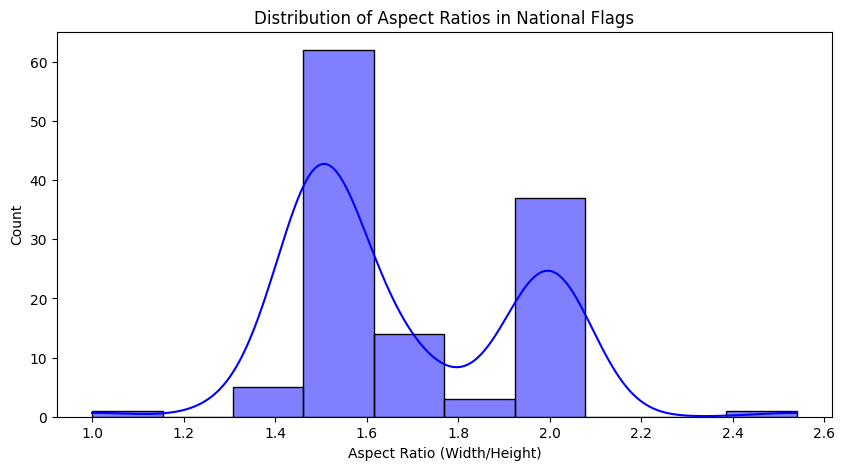

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Aspect Ratio"], bins=10, kde=True, color="blue")
plt.title("Distribution of Aspect Ratios in National Flags")
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Count")
plt.show()


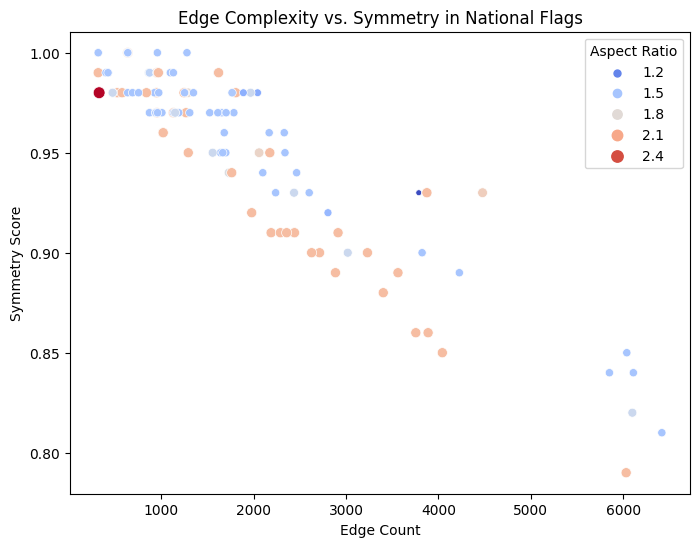

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Edge Count", y="Symmetry Score", hue="Aspect Ratio", palette="coolwarm", size="Aspect Ratio")
plt.title("Edge Complexity vs. Symmetry in National Flags")
plt.xlabel("Edge Count")
plt.ylabel("Symmetry Score")
plt.show()


# Textual analysis

In [17]:
import os
import pandas as pd
import nltk
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import spacy

# Load NLP model
nlp = spacy.load("en_core_web_sm")

# Path to anthem text files
ANTHEMS_FOLDER = "/kaggle/working/anthems_text/"

# Load stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Store anthem data
anthem_data = []

# Process each anthem file
for filename in os.listdir(ANTHEMS_FOLDER):
    if filename.endswith(".txt"):
        country = filename.replace(".txt", "")
        with open(os.path.join(ANTHEMS_FOLDER, filename), "r", encoding="utf-8") as file:
            text = file.read()

            # Clean text
            cleaned_text = clean_text(text)

            # Sentiment analysis
            sentiment_score = TextBlob(text).sentiment.polarity

            # Named Entity Recognition (NER)
            doc = nlp(text)
            entities = [ent.text for ent in doc.ents]

            # Store data
            anthem_data.append({
                "Country": country,
                "Word Count": len(cleaned_text.split()),
                "Sentiment Score": sentiment_score,
                "Named Entities": ", ".join(set(entities))
            })

# Save to CSV
df = pd.DataFrame(anthem_data)
df.to_csv("/kaggle/working/anthem_analysis.csv", index=False)
print("✅ Textual analysis saved to `/kaggle/working/anthem_analysis.csv`")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
✅ Textual analysis saved to `/kaggle/working/anthem_analysis.csv`


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          103 non-null    object 
 1   Word Count       103 non-null    int64  
 2   Sentiment Score  103 non-null    float64
 3   Named Entities   103 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [19]:
df.head()

,Country,Word Count,Sentiment Score,Named Entities
0,gw,50,0.171616,Peace
1,fj,74,0.317857,"Fiji Shores, Fiji For Fiji, Fiji, Onward, Stan..."
2,au,71,0.409091,"Commonwealth, Advance Australia, Nature, Austr..."
3,cm,65,0.370455,"North, Africa, West, Dear Fatherland, East, On..."
4,pn,63,0.387500,"Pitcairn Island, today, Our Island"


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


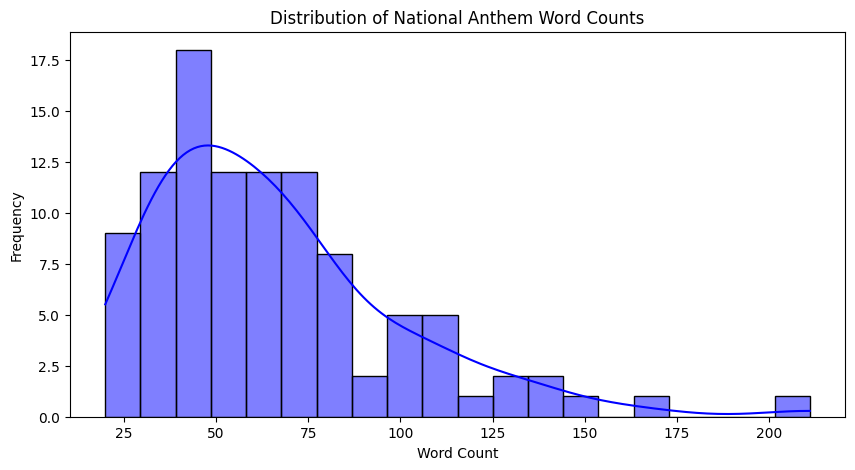

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Word Count"], bins=20, kde=True, color="blue")
plt.title("Distribution of National Anthem Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [21]:
import os
import re
import nltk

# Paths
RAW_ANTHEMS_FOLDER = "/kaggle/working/anthems_text/"
CLEANED_ANTHEMS_FOLDER = "/kaggle/working/cleaned_anthems_text/"

# Create cleaned text directory
os.makedirs(CLEANED_ANTHEMS_FOLDER, exist_ok=True)

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Process each anthem file and save cleaned version
for filename in os.listdir(RAW_ANTHEMS_FOLDER):
    if filename.endswith(".txt"):
        raw_path = os.path.join(RAW_ANTHEMS_FOLDER, filename)
        cleaned_path = os.path.join(CLEANED_ANTHEMS_FOLDER, filename)

        with open(raw_path, "r", encoding="utf-8") as file:
            raw_text = file.read()

        # Clean text
        cleaned_text = clean_text(raw_text)

        # Save cleaned text
        with open(cleaned_path, "w", encoding="utf-8") as cleaned_file:
            cleaned_file.write(cleaned_text)

print("✅ Cleaned anthems saved in `/kaggle/working/cleaned_anthems_text/`")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
✅ Cleaned anthems saved in `/kaggle/working/cleaned_anthems_text/`


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


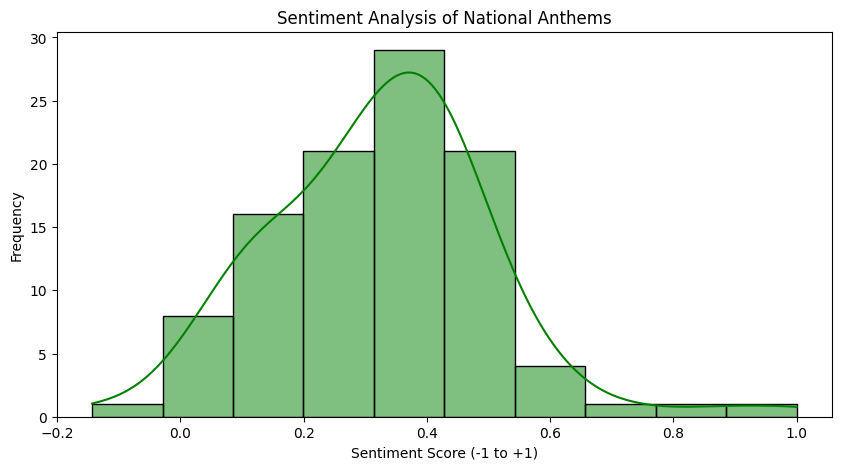

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Sentiment Score"], bins=10, kde=True, color="green")
plt.title("Sentiment Analysis of National Anthems")
plt.xlabel("Sentiment Score (-1 to +1)")
plt.ylabel("Frequency")
plt.show()


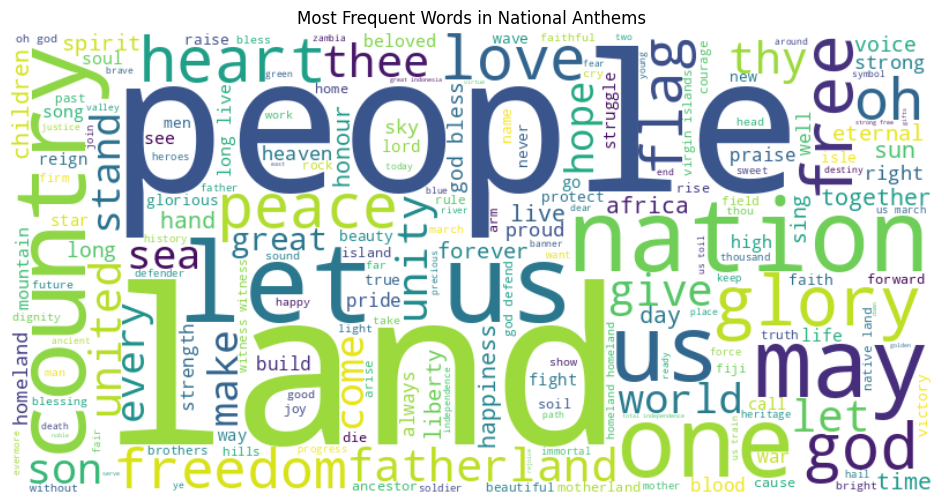

In [23]:
all_words = " ".join(clean_text(open(os.path.join(ANTHEMS_FOLDER, f), "r", encoding="utf-8").read())
                     for f in os.listdir(ANTHEMS_FOLDER) if f.endswith(".txt"))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in National Anthems")
plt.show()


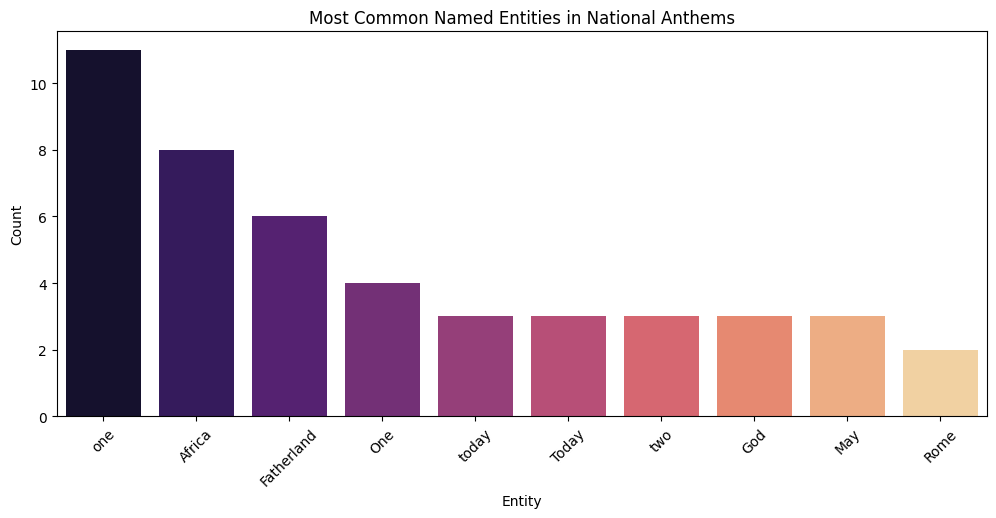

In [24]:
# Extract top 10 most common entities
all_entities = " ".join(df["Named Entities"].dropna()).split(", ")
entity_counts = Counter(all_entities)
top_entities = pd.DataFrame(entity_counts.items(), columns=["Entity", "Count"]).sort_values(by="Count", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x="Entity", y="Count", data=top_entities, palette="magma")
plt.xticks(rotation=45)
plt.title("Most Common Named Entities in National Anthems")
plt.show()


# Audio analysis

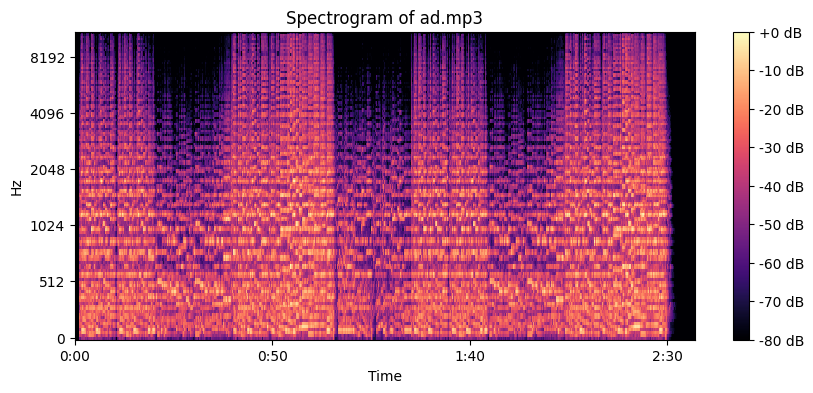

In [26]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_spectrogram(audio_path):
    y, sr = librosa.load(audio_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {os.path.basename(audio_path)}')
    plt.show()

plot_spectrogram("/kaggle/working/anthems_music/ad.mp3")

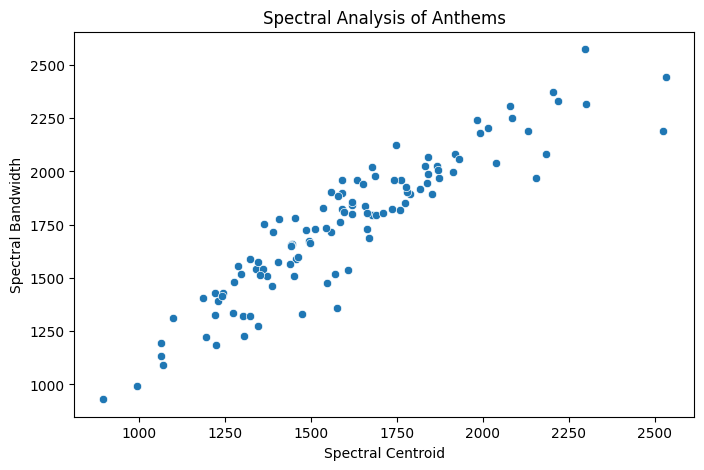

Average Tempo: 101.69 BPM
Average Spectral Centroid: 1606.12
Average Spectral Bandwidth: 1747.01


In [30]:
def analyze_anthem_audio(audio_dir):
    tempos = []
    spectral_centroids = []
    spectral_bandwidths = []
    
    for anthem in os.listdir(audio_dir):
        if anthem.endswith('.mp3'):
            y, sr = librosa.load(os.path.join(audio_dir, anthem))
            
            # Extract tempo
            tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
            tempos.append(tempo)
            
            # Extract spectral features
            spec_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            spectral_centroids.append(spec_centroid)
            
            spec_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
            spectral_bandwidths.append(spec_bandwidth)

    
    # Plot spectral centroid vs bandwidth
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=spectral_centroids, y=spectral_bandwidths)
    plt.xlabel("Spectral Centroid")
    plt.ylabel("Spectral Bandwidth")
    plt.title("Spectral Analysis of Anthems")
    plt.show()
    
    print(f"Average Tempo: {np.mean(tempos):.2f} BPM")
    print(f"Average Spectral Centroid: {np.mean(spectral_centroids):.2f}")
    print(f"Average Spectral Bandwidth: {np.mean(spectral_bandwidths):.2f}")

# Example Usage:
analyze_anthem_audio("/kaggle/working/anthems_music")


In [31]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    
    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    
    # Spectral Features
    spec_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spec_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spec_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    
    # Zero-Crossing Rate (ZCR)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
    
    # Chroma Features (Harmonic Content)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    
    # Harmonic-to-Noise Ratio (HNR)
    rms = librosa.feature.rms(y=y)
    hnr = np.mean(rms)
    
    return [tempo, spec_centroid, spec_bandwidth, spec_rolloff, zcr, chroma, hnr]

def analyze_all_anthems(audio_dir, output_csv):
    data = []
    
    for anthem in os.listdir(audio_dir):
        if anthem.endswith('.mp3'):
            features = extract_audio_features(os.path.join(audio_dir, anthem))
            data.append([anthem] + features)
    
    df = pd.DataFrame(data, columns=["Anthem", "Tempo", "Spectral Centroid", "Spectral Bandwidth", "Spectral Rolloff", "Zero-Crossing Rate", "Chroma Features", "Harmonic-to-Noise Ratio"])
    df.to_csv(output_csv, index=False)
    print("Audio analysis saved to", output_csv)


# Example Usage:
analyze_all_anthems("/kaggle/working/anthems_music", "anthem_audio_features.csv")



Audio analysis saved to anthem_audio_features.csv


# Multimodal Analysis

In [37]:
df = pd.read_csv("/kaggle/working/countries_flags_and_anthems.csv")
df_image = pd.read_csv("/kaggle/working/flag_image_analysis.csv")
df_text = pd.read_csv("/kaggle/working/anthem_analysis.csv")
df_audio = pd.read_csv("/kaggle/working/anthem_audio_features.csv")

In [39]:
print(df.columns)
print(df_image.columns)
print(df_text.columns)
print(df_audio.columns)


Index(['country_code', 'country_name', 'flag_path', 'anthem_music_path',
       'anthem_text_path'],
      dtype='object')
Index(['Country', 'Aspect Ratio', 'Dominant Color 1', 'Dominant Color 2',
       'Edge Count', 'Symmetry Score'],
      dtype='object')
Index(['Country', 'Word Count', 'Sentiment Score', 'Named Entities'], dtype='object')
Index(['Anthem', 'Tempo', 'Spectral Centroid', 'Spectral Bandwidth',
       'Spectral Rolloff', 'Zero-Crossing Rate', 'Chroma Features',
       'Harmonic-to-Noise Ratio'],
      dtype='object')


In [46]:
df_audio.head()

,Anthem,Tempo,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Zero-Crossing Rate,Chroma Features,Harmonic-to-Noise Ratio
0,st.mp3,[161.49902344],1735.270620,1823.346176,3252.995609,0.096014,0.274293,0.103687
1,mx.mp3,[103.359375],1372.421409,1507.753701,2581.234985,0.080060,0.305022,0.078300
2,az.mp3,[135.99917763],1445.510931,1659.049387,2740.301794,0.079446,0.314736,0.104297
3,mq.mp3,[129.19921875],1589.513170,1960.256250,3157.870498,0.069693,0.301251,0.047167
4,va.mp3,[99.38401442],1494.517252,1672.948499,2956.148007,0.080100,0.291915,0.036599


In [48]:
df_audio['Anthem'] = df_audio['Anthem'].str.replace(r'\.mp3$', '', regex=True)

In [49]:
df_audio.head()

,Anthem,Tempo,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Zero-Crossing Rate,Chroma Features,Harmonic-to-Noise Ratio
0,st,[161.49902344],1735.270620,1823.346176,3252.995609,0.096014,0.274293,0.103687
1,mx,[103.359375],1372.421409,1507.753701,2581.234985,0.080060,0.305022,0.078300
2,az,[135.99917763],1445.510931,1659.049387,2740.301794,0.079446,0.314736,0.104297
3,mq,[129.19921875],1589.513170,1960.256250,3157.870498,0.069693,0.301251,0.047167
4,va,[99.38401442],1494.517252,1672.948499,2956.148007,0.080100,0.291915,0.036599


In [42]:
!pip install kmeans_pytorch

In [44]:
!pip install kneed

In [45]:
import torch
import pandas as pd
import numpy as np
from kmeans_pytorch import kmeans
from kneed import KneeLocator
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm

In [50]:
def merge_multimodal_data(df, df_image, df_text, df_audio, output_csv):
    # Merge flag image features
    df_merged = df.merge(df_image, left_on='country_code', right_on='Country', how='left').drop(columns=['Country'])
    
    # Merge anthem text features
    df_merged = df_merged.merge(df_text, left_on='country_code', right_on='Country', how='left').drop(columns=['Country'])
    
    # Merge anthem audio features
    df_merged = df_merged.merge(df_audio, left_on='country_code', right_on='Anthem', how='left').drop(columns=['Anthem'])
    
    df_merged.to_csv(output_csv, index=False)
    print("Multimodal dataset saved to", output_csv)

In [51]:
merge_multimodal_data(df, df_image, df_text, df_audio, "df_multimodal.csv")

Multimodal dataset saved to df_multimodal.csv


In [52]:
df_multimodal = pd.read_csv("/kaggle/working/df_multimodal.csv")

In [53]:
df_multimodal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_code             100 non-null    object 
 1   country_name             100 non-null    object 
 2   flag_path                100 non-null    object 
 3   anthem_music_path        100 non-null    object 
 4   anthem_text_path         100 non-null    object 
 5   Aspect Ratio             100 non-null    float64
 6   Dominant Color 1         100 non-null    object 
 7   Dominant Color 2         100 non-null    object 
 8   Edge Count               100 non-null    int64  
 9   Symmetry Score           100 non-null    float64
 10  Word Count               100 non-null    int64  
 11  Sentiment Score          100 non-null    float64
 12  Named Entities           97 non-null     object 
 13  Tempo                    100 non-null    object 
 14  Spectral Centroid        10

In [54]:
df_multimodal.head()

,country_code,country_name,flag_path,anthem_music_path,anthem_text_path,Aspect Ratio,Dominant Color 1,Dominant Color 2,Edge Count,Symmetry Score,Word Count,Sentiment Score,Named Entities,Tempo,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Zero-Crossing Rate,Chroma Features,Harmonic-to-Noise Ratio
0,ai,Anguilla,/kaggle/working/flag_images/ai.jpg,/kaggle/working/anthems_music/ai.mp3,/kaggle/working/anthems_text/ai.txt,2.00,#f5eb,#1820,2714,0.90,64,0.406277,"May, Anguilla Nurture, Mighty, Proud",[123.046875],1740.622839,1958.187220,3502.600271,0.086233,0.268873,0.090332
1,ru,Russian Federation,/kaggle/working/flag_images/ru.jpg,/kaggle/working/anthems_music/ru.mp3,/kaggle/working/anthems_text/ru.txt,1.50,#ffff,#6a31,640,1.00,55,0.450651,"Native, one, Russia, the coming years, Ancient...",[83.35433468],1350.450869,1512.343552,2617.941994,0.081359,0.329881,0.086650
2,lt,Lithuania,/kaggle/working/flag_images/lt.jpg,/kaggle/working/anthems_music/lt.mp3,/kaggle/working/anthems_text/lt.txt,1.67,#de70,#006a,640,1.00,46,0.278571,"Lithuania, May, Lithuania Brightly, Light, Gui...",[75.99954044],1747.329721,2122.325579,3633.674381,0.081961,0.322415,0.103453
3,nr,Nauru,/kaggle/working/flag_images/nr.jpg,/kaggle/working/anthems_music/nr.mp3,/kaggle/working/anthems_text/nr.txt,2.00,#0121,#f5cb,954,0.99,28,0.483333,Nauru,[75.99954044],1346.330614,1273.180785,2390.870147,0.096700,0.287533,0.122102
4,bg,Bulgaria,/kaggle/working/flag_images/bg.jpg,/kaggle/working/anthems_music/bg.mp3,/kaggle/working/anthems_text/bg.txt,1.67,#6b5d,#fffe,640,1.00,32,0.400000,"Pirin, Thrace, Danube, Proud Balkan",[64.59960938],1449.285117,1507.465741,2749.600040,0.083309,0.300192,0.074708


This code performs clustering of countries based on multimodal data using K-Means implemented in PyTorch and visualizes the results on a world map. The data undergoes preprocessing, where categorical attributes, such as dominant colors, are converted into numerical values, and non-numeric features that are not required for clustering are removed. The tempo values are also standardized by stripping unnecessary characters and replacing missing values with the median. To determine the optimal number of clusters, the elbow method is applied using the `KneeLocator` library, which identifies the point where adding more clusters provides diminishing returns in reducing intra-cluster variance. The K-Means algorithm, implemented in PyTorch, is then applied to the preprocessed data, leveraging GPU acceleration for efficiency. After clustering, the results are merged with world map data from `plotly` to generate a choropleth visualization, where each country is color-coded based on its assigned cluster. This allows for an intuitive interpretation of global patterns in the dataset, enabling further analysis and insights.

  0%|          | 0/25 [00:00<?, ?it/s]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=5239494.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 155.27it/s, center_shift=1727534.750000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 195.65it/s, center_shift=832453.187500, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 212.14it/s, center_shift=429159.187500, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 221.70it/s, center_shift=15984.956055, iteration=5, tol=0.000100] 

[running kmeans]: 5it [00:00, 235.65it/s, center_shift=16852.125000, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 241.56it/s, center_shift=34352.414062, iteration=7, tol=0.000100]

[running kmeans]: 7it [00:00, 246.99it/s, center_shift=19072.728516, iteration=8, tol=0.000100]

[running kmeans]: 8it [00:00, 251.63it/s, center_shift=4701.462891, iteration=9, tol=0.000100] 

[running kmeans]: 9it [00:00, 257.19it/s, center_shift=4077.178467, iteration=10, to

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=18073168.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 167.04it/s, center_shift=4086364.000000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 209.86it/s, center_shift=419822.062500, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 231.96it/s, center_shift=101132.148438, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 245.38it/s, center_shift=19485.843750, iteration=5, tol=0.000100] 

[running kmeans]: 5it [00:00, 252.82it/s, center_shift=19679.566406, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 254.27it/s, center_shift=2141.870361, iteration=7, tol=0.000100] 

[running kmeans]: 7it [00:00, 258.01it/s, center_shift=5123.323242, iteration=8, tol=0.000100]

[running kmeans]: 8it [00:00, 258.28it/s, center_shift=10967.815430, iteration=9, tol=0.000100]

[running kmeans]: 9it [00:00, 261.39it/s, center_shift=29917.396484, iteration=10, t

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=7481389.500000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 156.82it/s, center_shift=4030978.250000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 202.90it/s, center_shift=651127.125000, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 225.20it/s, center_shift=3206783.750000, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 235.66it/s, center_shift=312706.906250, iteration=5, tol=0.000100] 

[running kmeans]: 5it [00:00, 240.26it/s, center_shift=552451.687500, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 243.66it/s, center_shift=510175.125000, iteration=7, tol=0.000100]

[running kmeans]: 7it [00:00, 247.81it/s, center_shift=23003.685547, iteration=8, tol=0.000100] 

[running kmeans]: 9it [00:00, 267.51it/s, center_shift=0.000000, iteration=9, tol=0.000100]    


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=11593712.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 168.49it/s, center_shift=2345471.250000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 204.16it/s, center_shift=2604185.500000, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 218.80it/s, center_shift=692136.437500, iteration=4, tol=0.000100] 

[running kmeans]: 4it [00:00, 227.38it/s, center_shift=571189.062500, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 235.33it/s, center_shift=300905.218750, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 241.15it/s, center_shift=2094424.750000, iteration=7, tol=0.000100]

[running kmeans]: 7it [00:00, 244.15it/s, center_shift=19640.892578, iteration=8, tol=0.000100]  

[running kmeans]: 8it [00:00, 245.06it/s, center_shift=55281.484375, iteration=9, tol=0.000100]

[running kmeans]: 9it [00:00, 247.84it/s, center_shift=92412.695312, iteratio

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=11765557.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 141.64it/s, center_shift=2094999.000000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 190.16it/s, center_shift=357341.343750, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 207.99it/s, center_shift=141441.781250, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 219.83it/s, center_shift=124778.015625, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 221.09it/s, center_shift=33882.914062, iteration=6, tol=0.000100] 

[running kmeans]: 6it [00:00, 223.85it/s, center_shift=27703.894531, iteration=7, tol=0.000100]

[running kmeans]: 7it [00:00, 223.04it/s, center_shift=81375.640625, iteration=8, tol=0.000100]

[running kmeans]: 8it [00:00, 226.85it/s, center_shift=143594.187500, iteration=9, tol=0.000100]

[running kmeans]: 9it [00:00, 230.06it/s, center_shift=56599.558594, iteration=10

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=23498336.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 150.48it/s, center_shift=4979888.500000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 183.21it/s, center_shift=2177387.250000, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 202.71it/s, center_shift=1089790.250000, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 210.78it/s, center_shift=296363.406250, iteration=5, tol=0.000100] 

[running kmeans]: 5it [00:00, 221.34it/s, center_shift=252187.687500, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 225.17it/s, center_shift=90149.656250, iteration=7, tol=0.000100] 

[running kmeans]: 7it [00:00, 228.88it/s, center_shift=69187.687500, iteration=8, tol=0.000100]

[running kmeans]: 8it [00:00, 230.53it/s, center_shift=15926.044922, iteration=9, tol=0.000100]

[running kmeans]: 9it [00:00, 234.66it/s, center_shift=4592.838867, iteration=1

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=24536248.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 146.19it/s, center_shift=7671747.500000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 179.37it/s, center_shift=1972672.750000, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 197.91it/s, center_shift=2128864.750000, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 205.64it/s, center_shift=118086.507812, iteration=5, tol=0.000100] 

[running kmeans]: 5it [00:00, 209.38it/s, center_shift=150509.765625, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 215.49it/s, center_shift=55765.671875, iteration=7, tol=0.000100] 

[running kmeans]: 7it [00:00, 218.56it/s, center_shift=34363.730469, iteration=8, tol=0.000100]

[running kmeans]: 8it [00:00, 222.42it/s, center_shift=42997.839844, iteration=9, tol=0.000100]

[running kmeans]: 9it [00:00, 225.60it/s, center_shift=187456.765625, iteration

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=28857996.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 140.03it/s, center_shift=17477320.000000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 177.05it/s, center_shift=1676065.875000, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 194.02it/s, center_shift=320601.031250, iteration=4, tol=0.000100] 

[running kmeans]: 4it [00:00, 200.41it/s, center_shift=51678.824219, iteration=5, tol=0.000100] 

[running kmeans]: 5it [00:00, 206.80it/s, center_shift=6998.541992, iteration=6, tol=0.000100] 

[running kmeans]: 7it [00:00, 227.17it/s, center_shift=0.000000, iteration=7, tol=0.000100]   


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=21013598.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 130.25it/s, center_shift=2510704.500000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 169.35it/s, center_shift=1130538.000000, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 190.25it/s, center_shift=771373.000000, iteration=4, tol=0.000100] 

[running kmeans]: 4it [00:00, 202.55it/s, center_shift=1040233.187500, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 204.12it/s, center_shift=358961.312500, iteration=6, tol=0.000100] 

[running kmeans]: 6it [00:00, 208.87it/s, center_shift=30738.773438, iteration=7, tol=0.000100] 

[running kmeans]: 7it [00:00, 208.81it/s, center_shift=149434.078125, iteration=8, tol=0.000100]

[running kmeans]: 8it [00:00, 213.37it/s, center_shift=125230.453125, iteration=9, tol=0.000100]

[running kmeans]: 9it [00:00, 215.57it/s, center_shift=16163.003906, iterati

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=27866830.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 128.26it/s, center_shift=8236534.000000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 163.12it/s, center_shift=4448613.000000, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 177.72it/s, center_shift=382433.687500, iteration=4, tol=0.000100] 

[running kmeans]: 4it [00:00, 188.63it/s, center_shift=7811.187012, iteration=5, tol=0.000100]  

[running kmeans]: 6it [00:00, 216.76it/s, center_shift=0.000000, iteration=6, tol=0.000100]   


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=25110248.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 134.06it/s, center_shift=3074770.750000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 169.18it/s, center_shift=891797.812500, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 186.68it/s, center_shift=233028.468750, iteration=4, tol=0.000100]

[running kmeans]: 5it [00:00, 225.03it/s, center_shift=0.000000, iteration=5, tol=0.000100]     


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=24585280.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 132.39it/s, center_shift=955486.187500, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 169.26it/s, center_shift=485865.312500, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 185.70it/s, center_shift=396566.218750, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 195.66it/s, center_shift=1173837.375000, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 202.69it/s, center_shift=5528.904785, iteration=6, tol=0.000100]   

[running kmeans]: 7it [00:00, 225.46it/s, center_shift=0.000000, iteration=7, tol=0.000100]   
 48%|████▊     | 12/25 [00:00<00:00, 20.93it/s]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=22325228.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 130.52it/s, center_shift=6568857.500000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 161.60it/s, center_shift=199674.906250, iteration=3, tol=0.000100] 

[running kmeans]: 4it [00:00, 207.60it/s, center_shift=0.000000, iteration=4, tol=0.000100]     


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=42143788.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 99.49it/s, center_shift=4943841.500000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 135.15it/s, center_shift=696310.000000, iteration=3, tol=0.000100]

[running kmeans]: 4it [00:00, 187.65it/s, center_shift=0.000000, iteration=4, tol=0.000100]     


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=33456882.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 115.18it/s, center_shift=12562324.000000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 149.69it/s, center_shift=4101949.000000, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 168.02it/s, center_shift=3920083.750000, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 179.28it/s, center_shift=1159029.125000, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 186.15it/s, center_shift=724276.125000, iteration=6, tol=0.000100] 

[running kmeans]: 6it [00:00, 191.20it/s, center_shift=115964.109375, iteration=7, tol=0.000100]

[running kmeans]: 7it [00:00, 195.60it/s, center_shift=143028.093750, iteration=8, tol=0.000100]

[running kmeans]: 9it [00:00, 213.36it/s, center_shift=0.000000, iteration=9, tol=0.000100]     
 60%|██████    | 15/25 [00:00<00:00, 23.39it/s]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=24184812.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 125.59it/s, center_shift=7879040.500000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 150.38it/s, center_shift=739769.687500, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 165.29it/s, center_shift=152689.718750, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 173.45it/s, center_shift=165646.734375, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 178.11it/s, center_shift=244393.250000, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 183.68it/s, center_shift=149621.968750, iteration=7, tol=0.000100]

[running kmeans]: 8it [00:00, 202.77it/s, center_shift=0.000000, iteration=8, tol=0.000100]     


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=31213576.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 119.29it/s, center_shift=2041270.750000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 151.37it/s, center_shift=203302.406250, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 161.08it/s, center_shift=75200.242188, iteration=4, tol=0.000100] 

[running kmeans]: 4it [00:00, 171.04it/s, center_shift=16439.320312, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 176.28it/s, center_shift=21238.431641, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 180.88it/s, center_shift=7034.296387, iteration=7, tol=0.000100] 

[running kmeans]: 8it [00:00, 200.41it/s, center_shift=0.000000, iteration=8, tol=0.000100]   


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=43365428.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 119.64it/s, center_shift=8991967.000000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 151.87it/s, center_shift=867731.812500, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 163.14it/s, center_shift=455582.250000, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 167.97it/s, center_shift=212579.390625, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 172.51it/s, center_shift=120416.773438, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 175.83it/s, center_shift=40609.714844, iteration=7, tol=0.000100] 

[running kmeans]: 8it [00:00, 195.00it/s, center_shift=0.000000, iteration=8, tol=0.000100]    
 72%|███████▏  | 18/25 [00:00<00:00, 22.46it/s]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=36517128.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 113.85it/s, center_shift=6077106.000000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 141.22it/s, center_shift=1560024.750000, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 156.11it/s, center_shift=191950.250000, iteration=4, tol=0.000100] 

[running kmeans]: 4it [00:00, 165.70it/s, center_shift=47650.593750, iteration=5, tol=0.000100] 

[running kmeans]: 6it [00:00, 191.80it/s, center_shift=0.000000, iteration=6, tol=0.000100]    


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=39699764.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 122.45it/s, center_shift=6285608.500000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 146.99it/s, center_shift=193870.562500, iteration=3, tol=0.000100] 

[running kmeans]: 3it [00:00, 156.89it/s, center_shift=172866.796875, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 165.85it/s, center_shift=13635.055664, iteration=5, tol=0.000100] 

[running kmeans]: 5it [00:00, 171.60it/s, center_shift=65712.617188, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 173.46it/s, center_shift=48189.121094, iteration=7, tol=0.000100]

[running kmeans]: 8it [00:00, 191.18it/s, center_shift=0.000000, iteration=8, tol=0.000100]    


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=23366734.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 104.65it/s, center_shift=4120066.500000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 135.05it/s, center_shift=5082168.000000, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 153.11it/s, center_shift=3579133.750000, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 162.97it/s, center_shift=25083.453125, iteration=5, tol=0.000100]  

[running kmeans]: 5it [00:00, 167.52it/s, center_shift=42917.468750, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 171.50it/s, center_shift=46491.968750, iteration=7, tol=0.000100]

[running kmeans]: 8it [00:00, 191.35it/s, center_shift=0.000000, iteration=8, tol=0.000100]    
 84%|████████▍ | 21/25 [00:01<00:00, 22.35it/s]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=45196052.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 103.03it/s, center_shift=3210629.750000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 135.28it/s, center_shift=4391220.500000, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 148.66it/s, center_shift=2399903.250000, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 157.24it/s, center_shift=49013.179688, iteration=5, tol=0.000100]  

[running kmeans]: 6it [00:00, 183.94it/s, center_shift=0.000000, iteration=6, tol=0.000100]    


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=41479840.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 92.88it/s, center_shift=8356113.500000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 126.98it/s, center_shift=356891.312500, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 140.35it/s, center_shift=103625.601562, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 150.19it/s, center_shift=458033.031250, iteration=5, tol=0.000100]

[running kmeans]: 6it [00:00, 175.46it/s, center_shift=0.000000, iteration=6, tol=0.000100]     


running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=29334950.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 94.87it/s, center_shift=8482989.000000, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 123.24it/s, center_shift=21989.447266, iteration=3, tol=0.000100] 

[running kmeans]: 4it [00:00, 160.85it/s, center_shift=0.000000, iteration=4, tol=0.000100]    
 96%|█████████▌| 24/25 [00:01<00:00, 23.65it/s]

running k-means on cuda:0..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=41651072.000000, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 93.74it/s, center_shift=8836286.000000, iteration=2, tol=0.000100]

[running kmeans]: 3it [00:00, 152.28it/s, center_shift=0.000000, iteration=3, tol=0.000100]     
100%|██████████| 25/25 [00:01<00:00, 21.67it/s]


Optimal number of clusters: 11
running k-means on cuda:0..


[running kmeans]: 11it [00:00, 394.84it/s, center_shift=0.000000, iteration=11, tol=0.000100]    


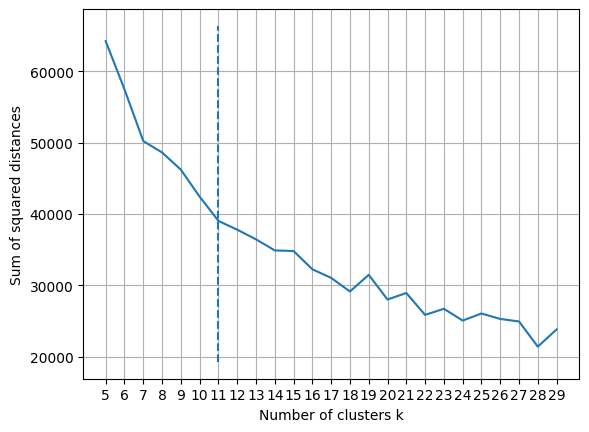

In [67]:
import torch
import pandas as pd
import numpy as np
from kmeans_pytorch import kmeans
from kneed import KneeLocator
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm
import pycountry

df_multimodal['country_name'] = df_multimodal['country_name'].apply(get_standard_country_name)

def preprocess_multimodal_data(df):
    # Convert categorical colors to numerical values using encoding
    df['Dominant Color 1'] = df['Dominant Color 1'].astype('category').cat.codes
    df['Dominant Color 2'] = df['Dominant Color 2'].astype('category').cat.codes
    
    # Convert tempo to numeric (handle potential non-numeric values)
    df['Tempo'] = df['Tempo'].astype(str).str.strip("[]").astype(float)
    df['Tempo'].fillna(df['Tempo'].median(), inplace=True)
    
    # Drop non-numeric columns not needed for clustering
    df_cluster = df.drop(columns=['country_code', 'country_name', 'flag_path', 'anthem_music_path', 'anthem_text_path', 'Named Entities'])
    return df_cluster

def cluster_countries(df, num_clusters=None, start=5, stop=30, save_elbow='elbow_plot.png', save_map='cluster_map.png'):
    df_cluster = preprocess_multimodal_data(df)
    
    # Convert dataframe to tensor
    x = torch.from_numpy(df_cluster.values.astype(np.float32))
    
    # Determine optimal number of clusters
    if num_clusters is None:
        min_dist_list = []
        for k in tqdm(range(start, stop)):
            cluster_ids, cluster_centers = kmeans(X=x, num_clusters=k, distance='euclidean', device=torch.device('cuda:0'))
            total_distance = sum(torch.norm(x[i] - cluster_centers[cluster_ids[i]]).item() for i in range(len(x)))
            min_dist_list.append(total_distance)
        
        kn = KneeLocator(range(start, stop), min_dist_list, curve='convex', direction='decreasing')
        num_clusters = kn.knee
        plt.plot(range(start, stop), min_dist_list)
        plt.xticks(range(start, stop))
        plt.vlines(num_clusters, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
        plt.xlabel('Number of clusters k')
        plt.ylabel('Sum of squared distances')
        plt.grid()
        plt.savefig(save_elbow, bbox_inches='tight')
        print(f'Optimal number of clusters: {num_clusters}')
    
    # Perform final clustering
    cluster_ids, _ = kmeans(X=x, num_clusters=num_clusters, distance='euclidean', device=torch.device('cuda:0'))
    df['cluster_assigned'] = cluster_ids.numpy()
    
    # Visualization on a world map
    df_world = px.data.gapminder().query("year == 2007")
    df_map = df_world.merge(df[['country_name', 'cluster_assigned']], how='left', left_on='country', right_on='country_name')
    
    fig = px.choropleth(
        df_map,
        locations="iso_alpha",
        color="cluster_assigned",
        hover_name="country",
        color_continuous_scale=px.colors.sequential.Plasma
    )
    fig.show()
    
    return df[['country_name', 'cluster_assigned']]

clustered_df = cluster_countries(df_multimodal)

In [63]:
clustered_df.head()

,country_name,cluster_assigned
0,Anguilla,2
1,Russian Federation,0
2,Lithuania,9
3,Nauru,4
4,Bulgaria,0


In [64]:
clustered_df.to_csv("clustered_data.csv", index=False)

In [68]:
import shutil
import os

# Define dataset path
dataset_dir = "/kaggle/working"

# Ensure directory exists
os.makedirs(dataset_dir, exist_ok=True)
shutil.make_archive("/kaggle/working/total_task3", 'zip', dataset_dir)

'/kaggle/working/total_task3.zip'